<a href="https://colab.research.google.com/github/leonaardoas/Knee-Osteoarthritis/blob/main/Knee_Osteoarthritis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalar a biblioteca kaggle
!pip install kaggle

In [2]:
# Fazer upload do arquivo kaggle.json
from google.colab import files
files.upload()  # Selecione o arquivo kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leonrdas","key":"e59d4c2088bfe23d8028451e2e7a8a49"}'}

In [3]:
# Mover o arquivo kaggle.json para a pasta correta
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Baixar o dataset Knee Osteoarthritis do Kaggle
!kaggle datasets download -d shashwatwork/knee-osteoarthritis-dataset-with-severity


Dataset URL: https://www.kaggle.com/datasets/shashwatwork/knee-osteoarthritis-dataset-with-severity
License(s): Attribution 4.0 International (CC BY 4.0)
knee-osteoarthritis-dataset-with-severity.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# Descompactar o arquivo ZIP baixado
!unzip knee-osteoarthritis-dataset-with-severity.zip

Archive:  knee-osteoarthritis-dataset-with-severity.zip
replace auto_test/0/9003175_1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
!ls

auto_test  knee-osteoarthritis-dataset-with-severity.zip  sample_data  test  train  val


In [7]:
import os

In [8]:
listimg = os.listdir("/content/test/0")
listimg

['9067811L.png',
 '9418342L.png',
 '9611246R.png',
 '9706172R.png',
 '9880717L.png',
 '9564716L.png',
 '9681294L.png',
 '9435273R.png',
 '9130362L.png',
 '9513860L.png',
 '9366178L.png',
 '9203454R.png',
 '9343691R.png',
 '9496443R.png',
 '9504627R.png',
 '9253884L.png',
 '9871731R.png',
 '9024409L.png',
 '9283061R.png',
 '9594682R.png',
 '9509846L.png',
 '9283061L.png',
 '9819744R.png',
 '9507392R.png',
 '9616228R.png',
 '9919548L.png',
 '9169499L.png',
 '9719243L.png',
 '9153255R.png',
 '9723972L.png',
 '9140556L.png',
 '9725978R.png',
 '9945026R.png',
 '9400725L.png',
 '9880717R.png',
 '9701165R.png',
 '9337068R.png',
 '9263652R.png',
 '9323060L.png',
 '9919548R.png',
 '9460076L.png',
 '9255567L.png',
 '9621160L.png',
 '9435273L.png',
 '9989352R.png',
 '9070290R.png',
 '9559860R.png',
 '9253225R.png',
 '9232553L.png',
 '9363408R.png',
 '9631230R.png',
 '9789177R.png',
 '9650074L.png',
 '9066155L.png',
 '9886808L.png',
 '9650074R.png',
 '9798787R.png',
 '9378288R.png',
 '9409198L.png

In [9]:
import pandas as pd

In [10]:
rotulos = [0, 1, 2, 3, 4]

In [28]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

In [29]:
# Carregar as imagens de treino
for rotulo1 in rotulos:
    lnk = f'/content/train/{rotulo1}'
    arquivos = os.listdir(lnk)
    dftrain = pd.DataFrame(arquivos, columns=["imagem"])  # Definir a coluna como 'imagem'
    dftrain["classe"] = rotulo1
    df1 = pd.concat([df1, dftrain], ignore_index=True)

# Carregar as imagens de validação
for rotulo2 in rotulos:
    lnk = f'/content/val/{rotulo2}'
    arquivos = os.listdir(lnk)
    dfval = pd.DataFrame(arquivos, columns=["imagem"])  # Definir a coluna como 'imagem'
    dfval["classe"] = rotulo2
    df2 = pd.concat([df2, dfval], ignore_index=True)

# Carregar as imagens de teste
for rotulo3 in rotulos:
    lnk = f'/content/test/{rotulo3}'
    arquivos = os.listdir(lnk)
    dftest = pd.DataFrame(arquivos, columns=["imagem"])  # Definir a coluna como 'imagem'
    dftest["classe"] = rotulo3
    df3 = pd.concat([df3, dftest], ignore_index=True)

In [13]:
import matplotlib.pyplot as plt

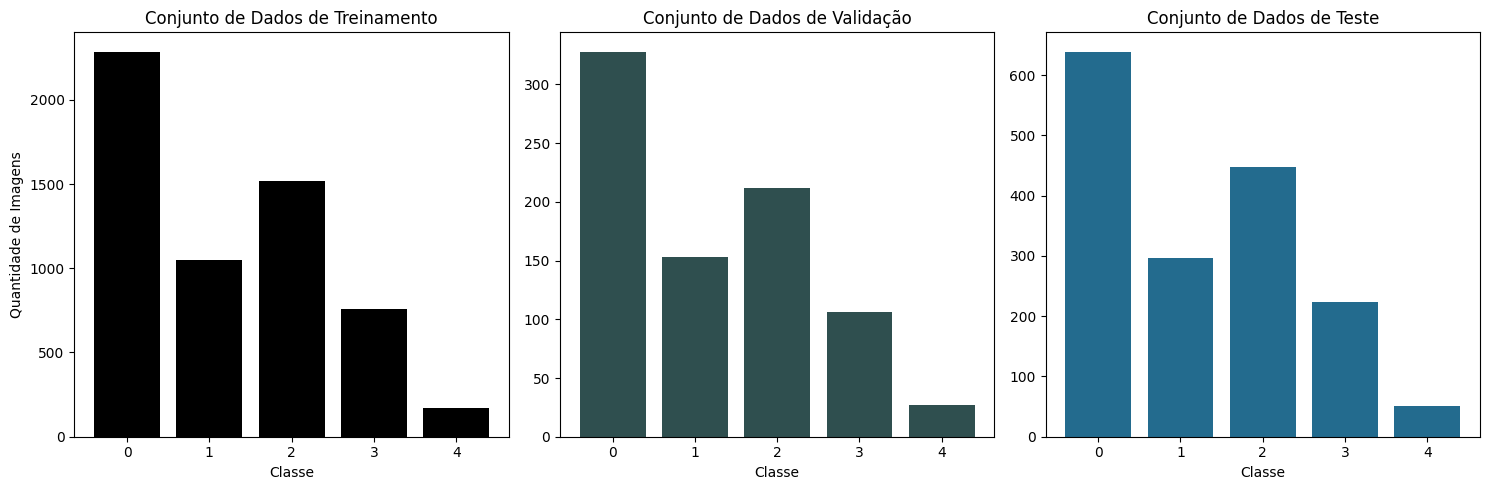

In [30]:
# Contar as ocorrências de cada classe em cada DataFrame
contagem_df1 = df1['classe'].value_counts()
contagem_df2 = df2['classe'].value_counts()
contagem_df3 = df3['classe'].value_counts()

# Configurar o layout para 3 gráficos em uma linha
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico para df1
axes[0].bar(contagem_df1.index, contagem_df1.values, color='black')
axes[0].set_title('Conjunto de Dados de Treinamento')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Quantidade de Imagens')

# Gráfico para df2
axes[1].bar(contagem_df2.index, contagem_df2.values, color='#2F4F4F')
axes[1].set_title('Conjunto de Dados de Validação')
axes[1].set_xlabel('Classe')

# Gráfico para df3
axes[2].bar(contagem_df3.index, contagem_df3.values, color='#236B8E')
axes[2].set_title('Conjunto de Dados de Teste')
axes[2].set_xlabel('Classe')

# Exibir os gráficos
plt.tight_layout()
plt.show()


In [15]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tqdm import tqdm


In [31]:
# Função para carregar imagens
def load_images_from_folder(folder_path, df, target_size=(32, 32)):
    X_data = []
    for i in tqdm(range(df.shape[0])):
        # Construir o caminho completo para a imagem
        img_path = os.path.join(folder_path, str(df['classe'][i]), df['imagem'][i])

        # Carregar e processar a imagem
        img = image.load_img(img_path, target_size=target_size)
        img = image.img_to_array(img)
        img = img / 255.0  # Normalização
        X_data.append(img)

    return np.array(X_data)

# Diretórios das imagens
train_dir = '/content/train/'
val_dir = '/content/val/'
test_dir = '/content/test/'


In [35]:
# Carregar imagens de treino
X_train = load_images_from_folder(train_dir, df1)
y_train = np.array(df1['classe'])

100%|██████████| 5778/5778 [00:07<00:00, 728.24it/s]


In [36]:
# Carregar imagens de validação
X_val = load_images_from_folder(val_dir, df2)
y_val = np.array(df2['classe'])

100%|██████████| 826/826 [00:01<00:00, 728.78it/s]


In [37]:
# Carregar imagens de teste
X_test = load_images_from_folder(test_dir, df3)
y_test = np.array(df3['classe'])


100%|██████████| 1656/1656 [00:02<00:00, 821.15it/s]
